In [10]:
import sqlite3

conn = sqlite3.connect("sales.db")
cursor=conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales_data (
id INTEGER PRIMARY KEY,
date TEXT,
quantity INTEGER,
price REAL
)
''')
conn.commit()


In [13]:
sample_data = [
    ('2024-03-01',3,899.99),
    ('2024-04-01',9,899.99),
    ('2024-05-01',7,899.99),
]

cursor.executemany('''
INSERT INTO sales_data (date, quantity, price) 
VALUES(?,?,?)
''',sample_data)
conn.commit()


In [14]:
import pandas as pd

query ="SELECT * FROM sales_data WHERE quantity>3;"
df=pd.read_sql(query, conn)
print(df)

   id        date  quantity   price
0   2  2024-04-01         9  899.99
1   3  2024-05-01         7  899.99


Matplotlib is building the font cache; this may take a moment.


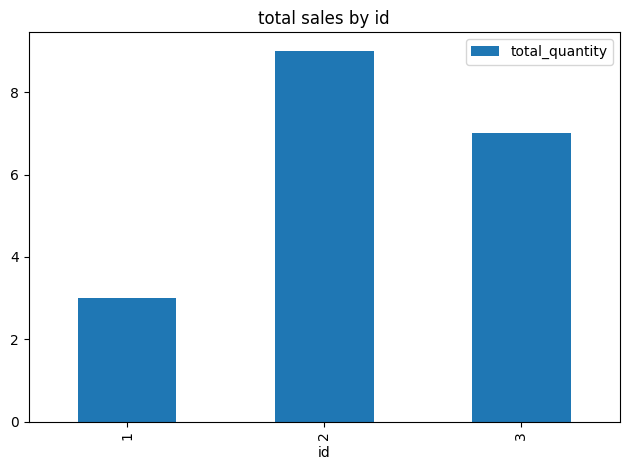

In [15]:
summary_query= '''
SELECT id, SUM(quantity) AS total_quantity
FROM sales_data
GROUP BY id
'''

summary_df = pd.read_sql(summary_query, conn)

import matplotlib.pyplot as plt

summary_df.plot(kind='bar',x='id',y='total_quantity',title='total sales by id')
plt.tight_layout()
plt.show()

In [16]:
conn.close()